## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [1]:
import pandas as pd

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/V-Marco/public_intro_to_DS_mba_hse/main/HW/HW5/Student_Behaviour.csv")

In [147]:
data.head(5)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    object 
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    object 
 14  GamesSpendingTime     235 non-null    object 
 15  TravellingTime        2

Пропусков нет

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [149]:
def numeric_view(x):
    return float(x[:-1])/100

In [150]:
data.CareerBasedonDegree

0      50%
1      75%
2      50%
3      50%
4      25%
      ... 
230    50%
231    75%
232    50%
233    75%
234    75%
Name: CareerBasedonDegree, Length: 235, dtype: object

In [151]:
data.CareerBasedonDegree = data.CareerBasedonDegree.map(numeric_view)

In [152]:
data.CareerBasedonDegree

0      0.50
1      0.75
2      0.50
3      0.50
4      0.25
       ... 
230    0.50
231    0.75
232    0.50
233    0.75
234    0.75
Name: CareerBasedonDegree, Length: 235, dtype: float64

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [153]:
data.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CareerBasedonDegree', 'GamesSpendingTime',
       'TravellingTime ', 'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

In [154]:
time1 = []
for x in data['DailyStudingTime']:
    if x.split()[-1] == "minute":
        x = float(x.split()[0])
    else:
        if x.split()[0] == "More":
            x = 60 * float(x.split()[-2])
        else:
            x = 60 * float(x.split()[0])
    time1.append(x)

In [155]:
time2 = []
for x in data['GamesSpendingTime']:
    if x.split()[-1] == "Minute":
        x = float(x.split()[0])
    else:
        if x.split()[0] == "More":
            x = 60 * float(x.split()[-2])
        else:
            x = 60 * float(x.split()[0])
    time2.append(x)

In [156]:
time3 = []
for x in data['TravellingTime ']:
    if x.split()[-1] == "Minute":
        x = float(x.split()[0])
    else:
        if x.split()[0] == "more":
            x = 60 * float(x.split()[-2])
        else:
            x = 60 * float(x.split()[0])
    time3.append(x)

In [157]:
data = data.drop(['DailyStudingTime', 'GamesSpendingTime', 'TravellingTime '], axis=1)

In [158]:
data['DailyStudingTime'] = time1
data['GamesSpendingTime'] = time2
data['TravellingTime'] = time3

In [159]:
data.head(5)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,StressLevel,FinancialStatus,PartTimeJob?,DailyStudingTime,GamesSpendingTime,TravellingTime
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,Morning,40000,No,0.50,Bad,Bad,No,0.0,78.0,1800.0
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,Morning,15000,Yes,0.75,Bad,Bad,No,30.0,60.0,0.0
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,Anytime,13000,Yes,0.50,Awful,Bad,No,60.0,120.0,1800.0
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,Anytime,1500000,No,0.50,Bad,good,No,60.0,78.0,0.0
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,Morning,50000,Yes,0.25,Good,good,No,30.0,78.0,1800.0


**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [160]:
real_variables = ['Height(CM)', 'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'CareerBasedonDegree', 'DailyStudingTime', 'GamesSpendingTime', 'TravellingTime']

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

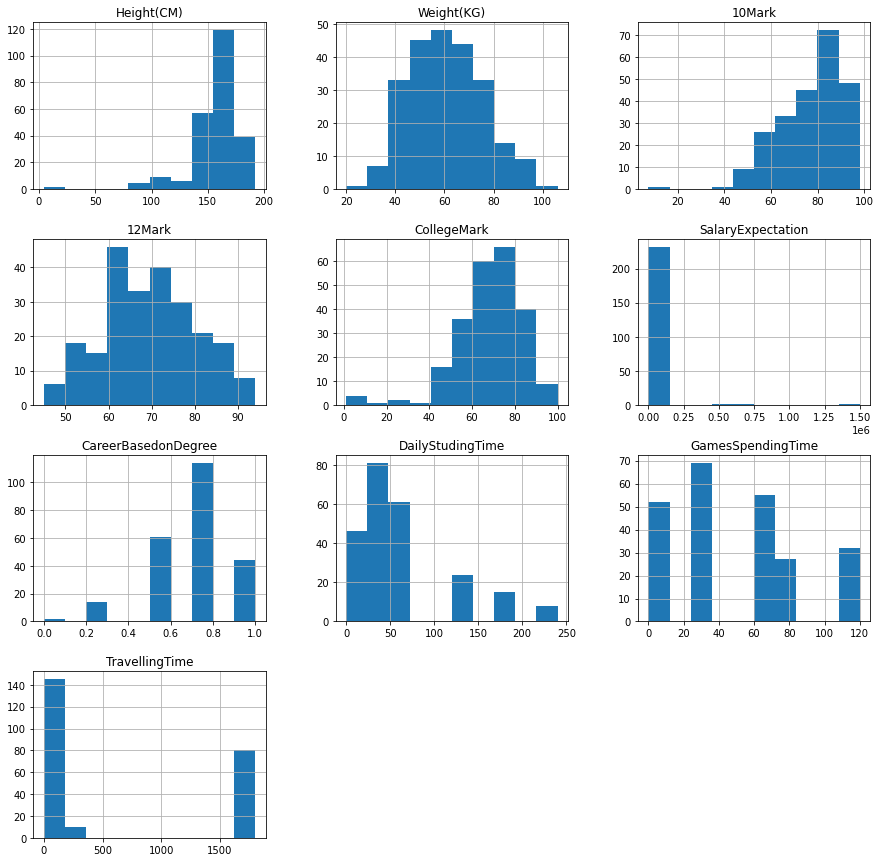

In [161]:
_ = data[real_variables].hist(figsize=(15,15))

Есть выбросы

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

In [162]:
data['LikeDegree'].value_counts()

Yes    215
No      20
Name: LikeDegree, dtype: int64

Перевешивает класс Yes более чем в 10 раз, дисбаланс. Можно использовать метрики точности, полноты и F меру. Нельзя использовать accuracy.

**Задание 8.**  Переведите целевую переменную к численному формату.

In [163]:
def to_num(x):
    if x == 'No':
        return 0
    else:
        return 1

In [164]:
data['LikeDegree'] = data.LikeDegree.map(to_num)

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [165]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3, random_state=201905, stratify=data['LikeDegree'])

print("Размер обучающей выборки:", train.shape)
print("Размер тестовой выборки:", test.shape)

Размер обучающей выборки: (164, 19)
Размер тестовой выборки: (71, 19)


**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [166]:
def naive_model(dataset):
    return np.array([1] * dataset.shape[0])

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [167]:
X_train = train[real_variables]
y_train = train.LikeDegree
X_test = test[real_variables]
y_test = test.LikeDegree

In [168]:
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors = 3)
clf1.fit(X_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors = 5)
clf2.fit(X_train, y_train)

clf3 = KNeighborsClassifier(n_neighbors = 7)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [169]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

In [170]:
df1 = pd.DataFrame([], columns=['model', 'precision', 'recall', 'f1'])
row1 = {'model': 'наивная модель', 'precision': precision_score(y_test, naive_model(X_test)), 'recall': recall_score(y_test, naive_model(X_test)), 'f1': f1_score(y_test, naive_model(X_test))}
row2 = {'model': '3 соседа', 'precision': precision_score(y_test, clf1.predict(X_test)), 'recall': recall_score(y_test, clf1.predict(X_test)), 'f1': f1_score(y_test, clf1.predict(X_test))}
row3 = {'model': '5 соседей', 'precision': precision_score(y_test, clf2.predict(X_test)), 'recall': recall_score(y_test, clf2.predict(X_test)), 'f1': f1_score(y_test, clf2.predict(X_test))}
row4 = {'model': '7 соседей', 'precision': precision_score(y_test, clf3.predict(X_test)), 'recall': recall_score(y_test, clf3.predict(X_test)), 'f1': f1_score(y_test, clf3.predict(X_test))}
df1 = df1.append([row1, row2, row3, row4])
df1

,model,precision,recall,f1
0,наивная модель,0.915493,1.000000,0.955882
1,3 соседа,0.913043,0.969231,0.940299
2,5 соседей,0.915493,1.000000,0.955882
3,7 соседей,0.915493,1.000000,0.955882


In [171]:
y_test.value_counts() / y_test.shape[0]

1    0.915493
0    0.084507
Name: LikeDegree, dtype: float64

4 модели дают одинаковый результат. Из-за дисбаланса определяются все объекты к большому классу. Точность соответстует доле большого класса, а полнота равна 1. Модель с тремя соседями имеет худщий результат, отличный от других

**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train))
X_test = pd.DataFrame(data=scaler.transform(X_test))

In [173]:
clf1 = KNeighborsClassifier(n_neighbors = 3)
clf1.fit(X_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors = 5)
clf2.fit(X_train, y_train)

clf3 = KNeighborsClassifier(n_neighbors = 7)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [174]:
df2 = pd.DataFrame([], columns=['model', 'precision', 'recall', 'f1'])
row2 = {'model': '3 соседа', 'precision': precision_score(y_test, clf1.predict(X_test)), 'recall': recall_score(y_test, clf1.predict(X_test)), 'f1': f1_score(y_test, clf1.predict(X_test))}
row3 = {'model': '5 соседей', 'precision': precision_score(y_test, clf2.predict(X_test)), 'recall': recall_score(y_test, clf2.predict(X_test)), 'f1': f1_score(y_test, clf2.predict(X_test))}
row4 = {'model': '7 соседей', 'precision': precision_score(y_test, clf3.predict(X_test)), 'recall': recall_score(y_test, clf3.predict(X_test)), 'f1': f1_score(y_test, clf3.predict(X_test))}
df2 = df2.append([row2, row3, row4])
df2

,model,precision,recall,f1
0,3 соседа,0.915493,1.0,0.955882
1,5 соседей,0.915493,1.0,0.955882
2,7 соседей,0.915493,1.0,0.955882


Все модели имеют одинаковый результат.

**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [175]:
data[real_variables] = data[real_variables].apply(lambda w: np.log(w + 1))

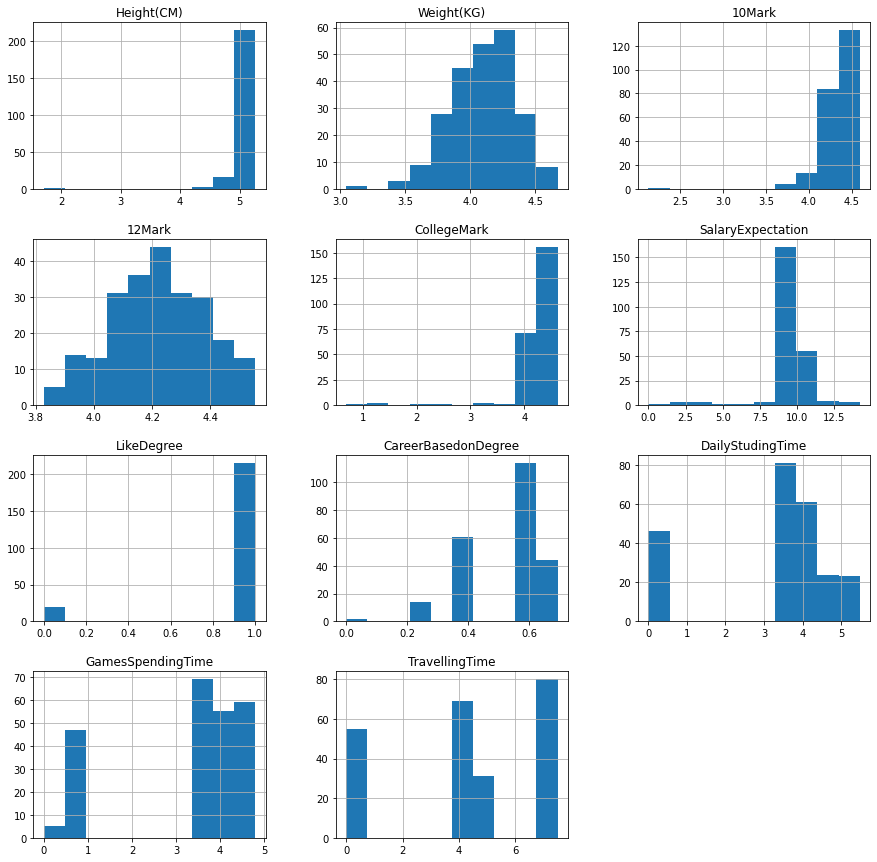

In [182]:
_ = data.hist(figsize=(15,15))

In [183]:
train, test = train_test_split(data, test_size = 0.3, random_state=201905, stratify=data['LikeDegree'])

In [184]:
X_train = train[real_variables]
y_train = train.LikeDegree
X_test = test[real_variables]
y_test = test.LikeDegree

In [185]:
clf1 = KNeighborsClassifier(n_neighbors = 3)
clf1.fit(X_train, y_train)

clf2 = KNeighborsClassifier(n_neighbors = 5)
clf2.fit(X_train, y_train)

clf3 = KNeighborsClassifier(n_neighbors = 7)
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [186]:
df3 = pd.DataFrame([], columns=['model', 'precision', 'recall', 'f1'])
row2 = {'model': '3 соседа', 'precision': precision_score(y_test, clf1.predict(X_test)), 'recall': recall_score(y_test, clf1.predict(X_test)), 'f1': f1_score(y_test, clf1.predict(X_test))}
row3 = {'model': '5 соседей', 'precision': precision_score(y_test, clf2.predict(X_test)), 'recall': recall_score(y_test, clf2.predict(X_test)), 'f1': f1_score(y_test, clf2.predict(X_test))}
row4 = {'model': '7 соседей', 'precision': precision_score(y_test, clf3.predict(X_test)), 'recall': recall_score(y_test, clf3.predict(X_test)), 'f1': f1_score(y_test, clf3.predict(X_test))}
df3= df3.append([row2, row3, row4])
df3

,model,precision,recall,f1
0,3 соседа,0.914286,0.984615,0.948148
1,5 соседей,0.915493,1.000000,0.955882
2,7 соседей,0.915493,1.000000,0.955882


**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

Учитывая, что в данных сильный дисбаланс классов, мы оценивали качество по трем метрикам: precision, recall, f1. Из-за большого перевеса одного класса, модели определяют только его (полнота 1, а точность соответствует доле этого класса), такие показатели дает и наивная модель. Лучшая конфигурация - модель с 3 ближайщими соседями на данных без выбросов. Она не работает как наивная модель. 5 и 7 соседей это много для маленького класса в нашей небольшой выборке.
Модель с тремя соседями после шкалирования показывала отличный от наивной модели результат, но точность и полнота все-таки выше на данных без выбросов. Думаю, для улучшения качества стоит рассмотреть шкалирование на данных без выброса, потому что шкалировние влияет на вычисление расстояния в knn.

In [79]:
1/(1+np.exp(-(0.2+0.12*4-0.01*34)))

0.5841905229354073

In [80]:
560 - 1.96*np.sqrt(625/100)

555.1

17

In [81]:
from scipy import stats

In [82]:
a = [13.53,  8.69, 14.98,  6.15, 11.36, 10.82,   8.98, 13.53, 16.91,  7.01]
b = [10.68, 12.64, 12.43, 10.79, 10.81, 17.64,  11.96, 16.00, 12.92, 13.49]

In [83]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-1.3068755687909026, pvalue=0.20770574095332278)

In [2]:
import numpy as np

In [16]:
(np.mean(a) - np.mean(b)) / (np.sqrt(np.var(a)/len(a) + np.var(b)/len(b)))

0.21115699454515027

18

In [13]:
x = [1, 10, 5, 7, 6, 4, 4, 4, 8, 9, 10]
y = [2, 4, 5, 4, 3, 3, 5, 2, 1, 5, 5]


np.corrcoef(x, y)

array([[1.        , 0.35808202],
       [0.35808202, 1.        ]])

19

In [14]:
stats.chisquare([25, 34, 47], [67, 14, 13])

Power_divergenceResult(statistic=143.8228637034607, pvalue=5.878438256989387e-32)

In [27]:
#410.83

20

In [16]:
data = pd.read_csv("c.csv")
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81.0,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100.0,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61.0,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71.0,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133.0,97


In [19]:
data.Beer_PerCapita.describe()

count    122.000000
mean     137.565574
std      104.817353
min        1.000000
25%       38.250000
50%      125.500000
75%      224.750000
max      376.000000
Name: Beer_PerCapita, dtype: float64

In [20]:
data.Region.value_counts()

Sub-Saharan Africa                 28
Central and Eastern Europe         27
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    11
Southeastern Asia                   5
Eastern Asia                        4
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [21]:
new_col = data["HappinessScore"].copy()
new_col[new_col > 6] = 1
new_col[new_col != 1] = 0
new_col = new_col.astype('int')
data['Happiness_coded'] = new_col
new_col.mean()

0.3360655737704918

In [23]:
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Happiness_coded
0,Denmark,Western Europe,north,7.526,928,53.579,224,81.0,278,1
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100.0,280,1
2,Iceland,Western Europe,north,7.501,933,60.530,233,61.0,78,1
3,Norway,Western Europe,north,7.498,951,70.890,169,71.0,129,1
4,Finland,Western Europe,north,7.413,918,43.433,263,133.0,97,1


In [24]:
data.HDI[(data.Hemisphere =="north")].mean()

760.4270833333334

In [25]:
data.Spirit_PerCapita.isna().sum()

16

In [26]:
dev = data.developer.copy()
dev = dev.filna('Ubisoft') #Ubisoft -мода

In [32]:
dev11 = dev.fillna(dev.median()) #Ubisoft -мода

In [38]:
dev11[dev11 > dev11.median()].count()

53

In [ ]:
dev.value_counts()

In [44]:
import matplotlib.pyplot as plt

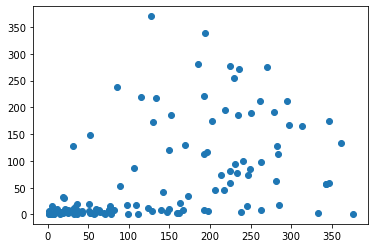

In [47]:
#рассеяния
plt.scatter(data.Beer_PerCapita, data.Wine_PerCapita)

In [48]:
data.corr().abs().loc['HappinessScore']

HappinessScore      1.000000
HDI                 0.815163
GDP_PerCapita       0.395246
Beer_PerCapita      0.493367
Spirit_PerCapita    0.256449
Wine_PerCapita      0.450589
Happiness_coded     0.799635
Name: HappinessScore, dtype: float64

In [49]:
(data.Beer_PerCapita)

0      224
1      185
2      233
3      169
4      263
      ... 
117     36
118     19
119     34
120     36
121      5
Name: Beer_PerCapita, Length: 122, dtype: int64

In [57]:
y = data.HappinessScore
X = np.array((data.Beer_PerCapita)**2).reshape(-1,1)

In [58]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [65]:
lr.coef_  #коэф при х
 #коэф при свободном члене

array([1.28844225e-05])

In [66]:
lr.intercept_

5.140602666786802

In [77]:
from sklearn.metrics import mean_absolute_error

In [84]:
XX = (data.Beer_PerCapita)**2

In [86]:
XX = pd.DataFrame(XX)

In [90]:
l = [1] * XX.shape[0]

In [91]:
XX['0']  = l

In [95]:
new_dataframe = XX.reindex(columns=['0', "Beer_PerCapita"])

In [96]:
new_dataframe

,0,Beer_PerCapita
0,1,50176
1,1,34225
2,1,54289
3,1,28561
4,1,69169
...,...,...
117,1,1296
118,1,361
119,1,1156
120,1,1296


In [99]:
mean_absolute_error(y, lr.predict(X))

0.8790980137114064